In [2]:
import pandas as pd
import io
import csv

# Reading the dataset
data = pd.read_csv('Data for Postpartum Depression Prediction in Bangladesh/PPD_dataset.csv')

# Cleaning the data
# Remove leading/trailing spaces and replace empty strings with NaN
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data = data.replace('', pd.NA)

# Handle missing values
# For categorical columns, fill NaN with 'Unknown'
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# For numerical columns (e.g., PHQ9 Score, EPDS Score), fill NaN with median
numerical_columns = ['PHQ9 Score', 'EPDS Score']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Define columns for encoding
multiclass_columns = [
    'Residence', 'Education Level', 'Marital status', 'Occupation before latest pregnancy',
    'Monthly income before latest pregnancy', 'Occupation After Your Latest Childbirth',
    'Current monthly income', 'Husband\'s education level', 'Husband’s monthly income',
    'Addiction', 'Total children', 'Disease before pregnancy', 'History of pregnancy loss',
    'Family type', 'Number of household members', 'Relationship with the in-laws',
    'Relationship with husband', 'Relationship with the newborn',
    'Relationship between father and newborn', 'Feeling about motherhood',
    'Recieved Support', 'Need for Support', 'Major changes or losses during pregnancy',
    'Pregnancy length', 'Age of newborn', 'Age of immediate older children',
    'Mode of delivery', 'Feeling for regular activities', 'PHQ9 Result', 'EPDS Result'
]

binary_columns = [
    'Abuse', 'Trust and share feelings', 'Pregnancy plan', 'Regular checkups',
    'Fear of pregnancy', 'Birth compliancy', 'Breastfeed', 'Newborn illness',
    'Worry about newborn', 'Relax/sleep when newborn is tended ',
    'Relax/sleep when the newborn is asleep', 'Angry after latest child birth',
    'Depression before pregnancy', 'Depression during pregnancy'
]

# Perform one-hot encoding for multiclass columns
data_encoded = pd.get_dummies(data, columns=multiclass_columns, prefix=multiclass_columns)

# Perform binary encoding for binary columns
for col in binary_columns:
    data_encoded[col] = data_encoded[col].map({'Yes': 1, 'No': 0, 'Unknown': pd.NA})
    data_encoded[col] = data_encoded[col].fillna(0)  # Fill NaN with 0 for binary columns

# Ensure no NaN values remain
data_encoded = data_encoded.fillna(0)

# Save the encoded dataset to a CSV file
output_file = 'encoded_PPD_dataset.csv'
data_encoded.to_csv(output_file, index=False)

# Output confirmation
print(f"Encoded dataset saved to {output_file}")

Encoded dataset saved to encoded_PPD_dataset.csv


C:\Users\user1\AppData\Local\Temp\ipykernel_10160\4065402502.py:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded[col] = data_encoded[col].fillna(0)  # Fill NaN with 0 for binary columns
C:\Users\user1\AppData\Local\Temp\ipykernel_10160\4065402502.py:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded[col] = data_encoded[col].fillna(0)  # Fill NaN with 0 for binary columns
C:\Users\user1\AppData\Local\Temp\ipykernel_10160\4065402502.py:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and 

In [3]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


FileNotFoundError: [Errno 2] No such file or directory: 'relax/sleep_when_the_newborn_is_asleep_bar.png'

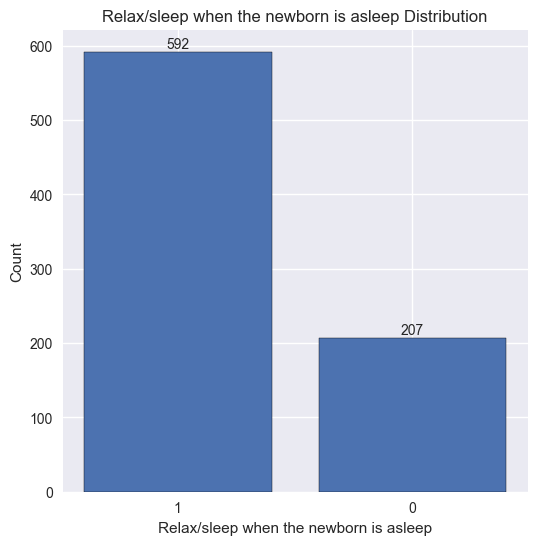

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set up plotting style

plt.style.use('seaborn-v0_8')

sns.set_palette("deep")

# Create output directory for plots
if not os.path.exists('ppd_visualizations'):
    os.makedirs('ppd_visualizations')

# Load and clean the dataset
df = pd.read_csv('PPD_dataset_cleaned.csv')

# Clean column names
df.columns = df.columns.str.strip().str.replace('"', '')

# Convert binary columns (True/False strings) to boolean
binary_cols = [col for col in df.columns if df[col].isin(['True', 'False']).all()]
for col in binary_cols:
    df[col] = df[col].map({'True': True, 'False': False})

# Convert numerical columns
numerical_cols = ['Age', 'PHQ9 Score', 'EPDS Score']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Define key categorical columns for pie charts
categorical_cols = [
    'Education Level_College', 'Education Level_High School', 'Education Level_High school',
    'Education Level_Primary School', 'Education Level_Primary school', 'Education Level_University',
    'Education Level_Unknown', 'Marital status_Divorced', 'Marital status_Married',
    'Gender of newborn_Boy', 'Gender of newborn_Girl'
]

# 1. Histograms for numerical features
def plot_histogram(data, column, bins, title, filename):
    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(data[column].dropna(), bins=bins, edgecolor='black')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    
    # Add counts on top of bars
    for i in range(len(counts)):
        plt.text(bins[i] + (bins[i+1] - bins[i])/2, counts[i] + 0.5, int(counts[i]),
                 ha='center', va='bottom', fontsize=10)
    
    plt.savefig(f'ppd_visualizations/{filename}.png', bbox_inches='tight')
    plt.close()

# Plot histograms
plot_histogram(df, 'Age', bins=10, title='Age Distribution', filename='age_histogram')
plot_histogram(df, 'PHQ9 Score', bins=8, title='PHQ9 Score Distribution', filename='phq9_histogram')
plot_histogram(df, 'EPDS Score', bins=8, title='EPDS Score Distribution', filename='epds_histogram')

# 2. Bar charts for binary features
binary_features = [
    'Trust and share feelings', 'Pregnancy plan', 'Regular checkups',
    'Fear of pregnancy', 'Birth compliancy', 'Breastfeed', 'Newborn illness',
    'Worry about newborn','Relax/sleep when the newborn is asleep', 'Angry after latest child birth',
    'Depression before pregnancy', 'Depression during pregnancy'
]

def plot_bar(data, column, title, filename):
    plt.figure(figsize=(6, 6))
    counts = data[column].value_counts()
    bars = plt.bar(counts.index.astype(str), counts.values, edgecolor='black')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    
    # Add counts on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
                 ha='center', va='bottom', fontsize=10)
    
    plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.close()

# Plot bar charts for binary features
for feature in binary_features:
    plot_bar(df, feature, f'{feature} Distribution', f'{feature.lower().replace(" ", "_")}_bar')

# 3. Pie charts for categorical features
def plot_pie(data, columns, prefix, title, filename):
    counts = {}
    for col in columns:
        if col.startswith(prefix):
            category = col.replace(prefix, '')
            counts[category] = data[col].sum()
    
    if not counts:
        return
    
    plt.figure(figsize=(8, 8))
    plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.savefig(f'ppd_visualizations/{filename}.png', bbox_inches='tight')
    plt.close()

# Plot pie charts
plot_pie(df, categorical_cols, 'Education Level_', 'Education Level Distribution', 'education_level_pie')
plot_pie(df, categorical_cols, 'Marital status_', 'Marital Status Distribution', 'marital_status_pie')
plot_pie(df, categorical_cols, 'Gender of newborn_', 'Gender of Newborn Distribution', 'gender_newborn_pie')

# 4. Correlation heatmap for numerical and binary features
correlation_cols = numerical_cols + binary_features
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical and Binary Features')
plt.savefig('ppd_visualizations/correlation_heatmap.png', bbox_inches='tight')
plt.close()

# 5. Box plots for PHQ9 and EPDS scores by categorical features
def plot_box(data, x_col, y_col, title, filename):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_col, y=y_col, data=data)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.savefig(f'ppd_visualizations/{filename}.png', bbox_inches='tight')
    plt.close()

# Create a single column for Education Level and Marital Status for box plots
df['Education Level'] = df[categorical_cols].filter(like='Education Level_').idxmax(axis=1).str.replace('Education Level_', '')
df['Marital Status'] = df[categorical_cols].filter(like='Marital status_').idxmax(axis=1).str.replace('Marital status_', '')

plot_box(df, 'Education Level', 'PHQ9 Score', 'PHQ9 Score by Education Level', 'phq9_education_box')
plot_box(df, 'Education Level', 'EPDS Score', 'EPDS Score by Education Level', 'epds_education_box')
plot_box(df, 'Marital Status', 'PHQ9 Score', 'PHQ9 Score by Marital Status', 'phq9_marital_box')
plot_box(df, 'Marital Status', 'EPDS Score', 'EPDS Score by Marital Status', 'epds_marital_box')

# 6. Print interesting ML insight
print("Interesting ML Insight:")
print("The correlation heatmap reveals relationships between features and PHQ9/EPDS scores.")
print("For example, 'Depression during pregnancy' and 'Angry after latest child birth' may show")
print("moderate correlations with PHQ9/EPDS scores, indicating potential importance for predicting")
print("postpartum depression. Check the correlation_heatmap.png for details.")
print("All visualizations are saved in the 'ppd_visualizations' folder.")